### Proyecto individual MLOps parte 2

### EDA

## Carga de datos

In [74]:
#importo la librerias necesarias para el eda
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('steam_games.csv', parse_dates=['release_date'])

df.head()

,genres,title,release_date,specs,price,early_access,sentiment,metascore
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018-01-04,['Single-player'],4.99,False,Sin comentarios,0.0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018-01-04,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,Mostly Positive,0.0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017-07-24,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,Mostly Positive,0.0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017-12-07,['Single-player'],0.99,False,Sin comentarios,0.0
4,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018-01-04,"['Single-player', 'Steam Achievements']",3.99,False,Mixed,0.0


In [75]:
# caracteristicas del DataFrame
df.shape

(27299, 8)

In [76]:
# para el modelo elimino la columna specs que creo que no es relevante para el modelo
df.drop(columns=['specs'], inplace = True)
df.columns

Index(['genres', 'title', 'release_date', 'price', 'early_access', 'sentiment',
       'metascore'],
      dtype='object')

In [77]:
# reviso la informacion de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299 entries, 0 to 27298
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        27299 non-null  object        
 1   title         27299 non-null  object        
 2   release_date  27299 non-null  datetime64[ns]
 3   price         27299 non-null  object        
 4   early_access  27299 non-null  bool          
 5   sentiment     27299 non-null  object        
 6   metascore     27299 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 1.3+ MB


In [78]:
# convierto la columna precio en numero
df["price"] = pd.to_numeric(df["price"], errors="coerce")

In [79]:
df.isnull().sum()

genres             0
title              0
release_date       0
price           1514
early_access       0
sentiment          0
metascore          0
dtype: int64

In [80]:
# Elimino los datos nulos de la columna precio
df = df.dropna(subset=['price'])

In [81]:
# Obtener resumen estadístico de las columnas numéricas
df.describe()

,release_date,price,metascore
count,25785,25785.000000,25785.000000
mean,2015-05-11 08:20:19.685863680,9.179902,6.815474
min,1983-06-19 00:00:00,0.490000,0.000000
25%,2014-10-03 00:00:00,2.990000,0.000000
50%,2016-04-22 00:00:00,4.990000,0.000000
75%,2017-04-19 00:00:00,9.990000,0.000000
max,2021-12-31 00:00:00,995.000000,96.000000
std,NaN,14.891728,21.373559


array([[<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'metascore'}>, <Axes: >]], dtype=object)

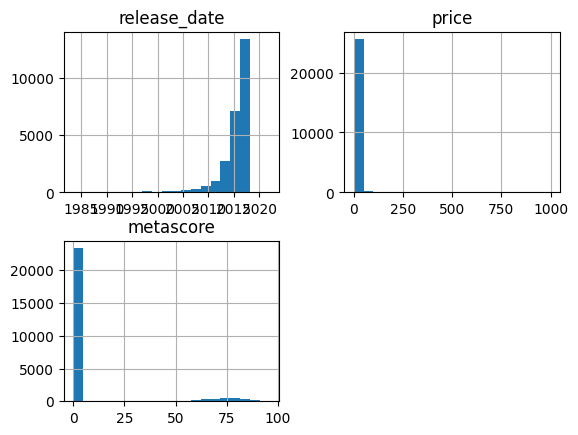

In [82]:
# defino un histograma para vere la frecuencias del conjunto de datos
df.hist(bins=20)

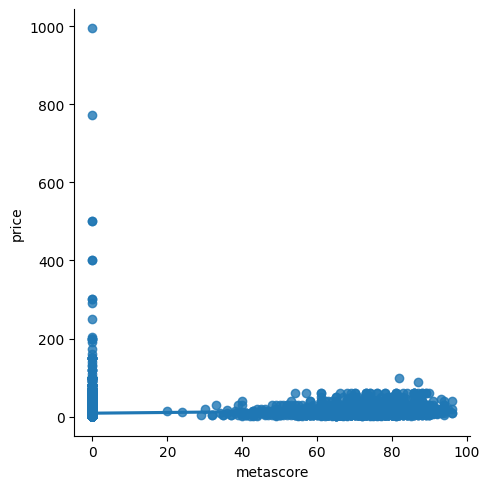

In [38]:

sns.lmplot(x='metascore', y='price', data=df)



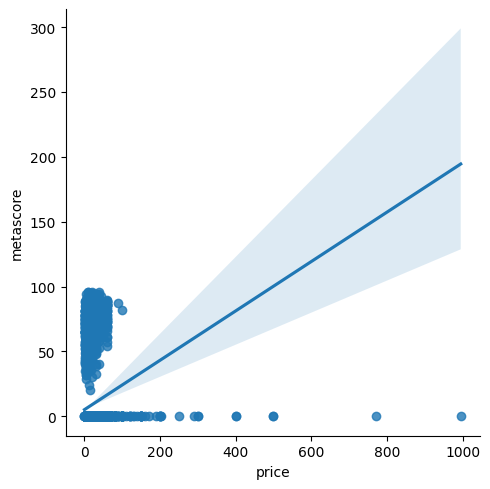

In [45]:
sns.lmplot(x='price', y='metascore', data=df)

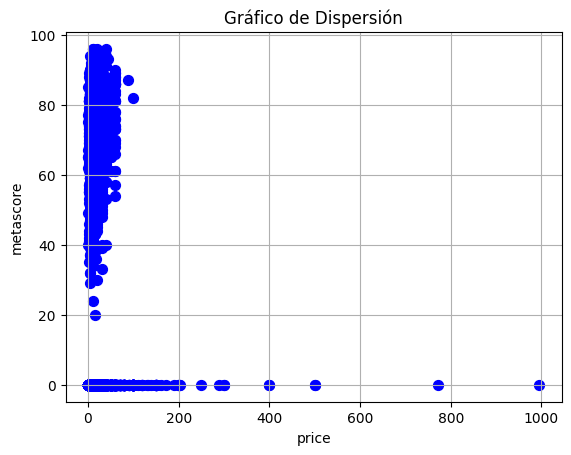

In [46]:
# Crear el gráfico de dispersión para las columnas 'variable_x' y 'variable_y'
plt.scatter(df['price'], df['metascore'], color='blue', marker='o', s=50)

# Configurar el gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('price')
plt.ylabel('metascore')
plt.grid(True)

# Mostrar el gráfico
plt.show()

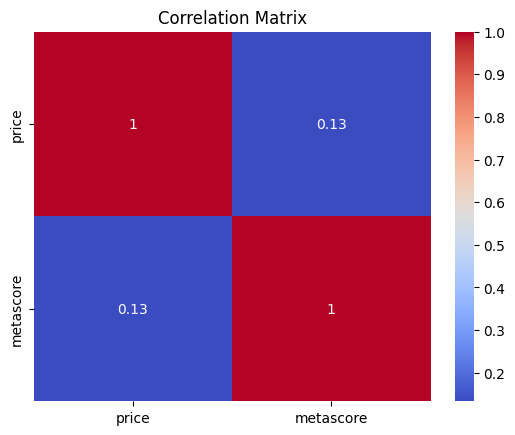

In [42]:
# Creo una variable de correlacion
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



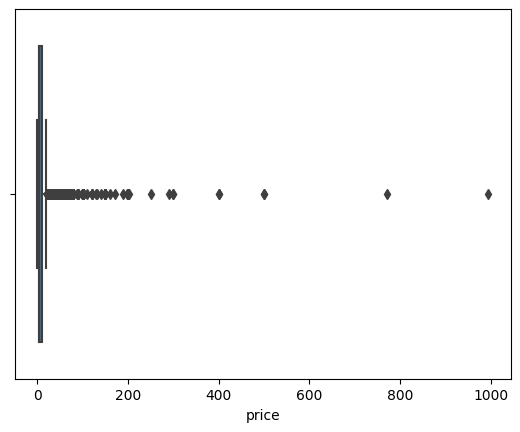

In [50]:
# Crear el diagrama de cajas para price
sns.boxplot(x=df['price'])

# Mostrar el gráfico
plt.show()

##### Se evidencia valores atipico para la columna precios

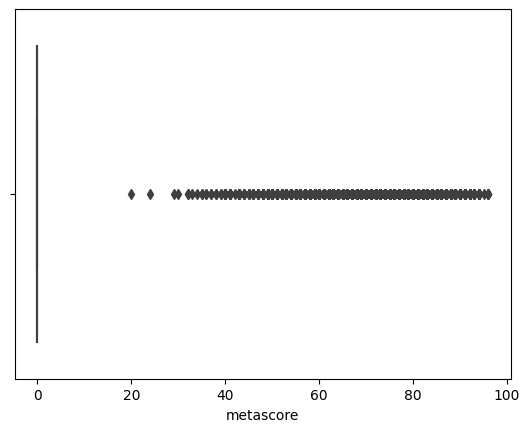

In [51]:
# Crear el diagrama de cajas para metascore
sns.boxplot(x=df['metascore'])

# Mostrar el gráfico
plt.show()

##### El metascore muestra valores atipico pero deve ser por que todos los registros nulos los converti en cero entoces la mayora de datos para metascore es cero

In [52]:
# Elimino los valores atipicos mayorea a 100 para ver si mejoran los datos
df = df.loc[df['price'] <= 100]

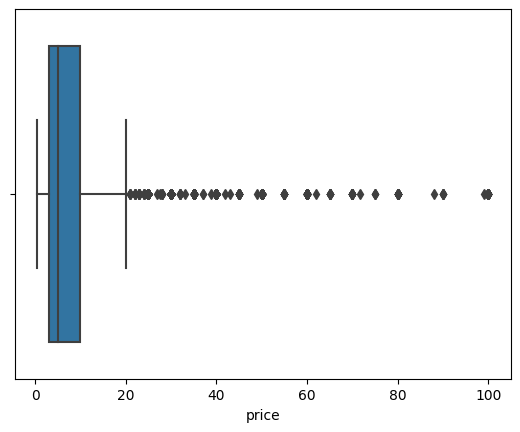

In [53]:
# Crear el diagrama de cajas
sns.boxplot(x=df['price'])

#sns.boxplot(x=df['metascore'])

# Mostrar el gráfico
plt.show()

In [55]:
# Se ven algo mejor, voy a eliminar los valores atipicos mayorea a 60 y ver si mejoran los datos
df = df.loc[df['price'] <= 60]

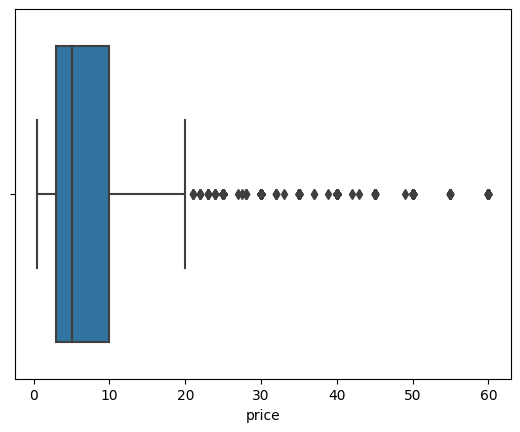

In [63]:
# Crear el diagrama de cajas
sns.boxplot(x=df['price'])

# Mostrar el gráfico
plt.show()




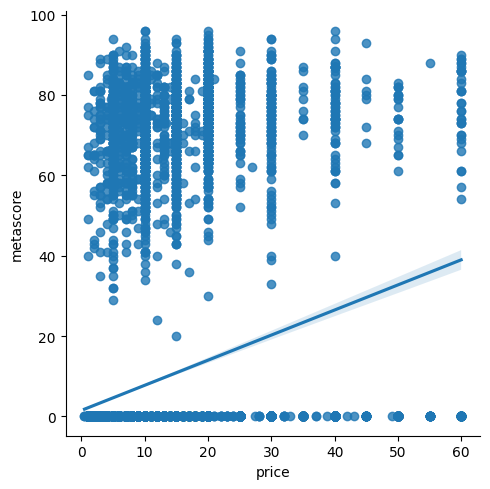

In [59]:
sns.lmplot(x='price', y='metascore', data=df)

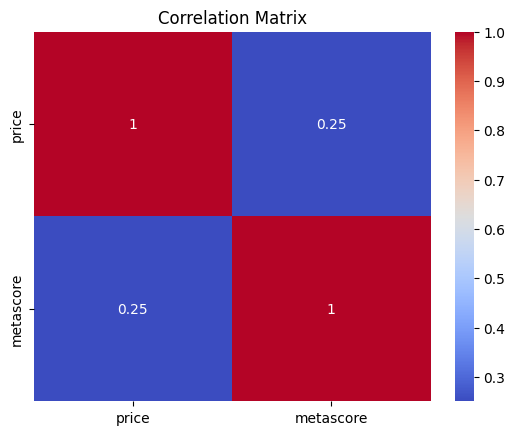

In [61]:
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

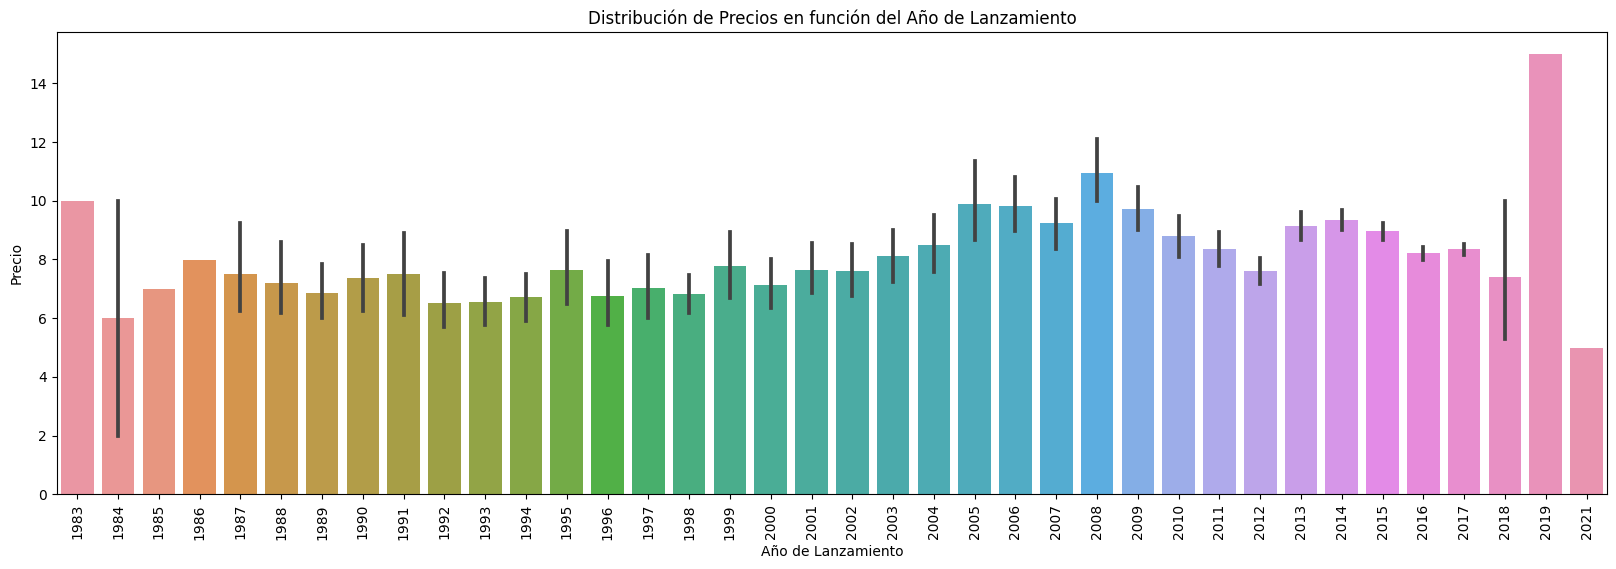

In [71]:
df['year'] = df['release_date'].dt.year

# Crea el gráfico de barras para la distribución de precios en función del año de lanzamiento
plt.figure(figsize=(20, 6))
sns.barplot(data=df, x='year', y='price')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio')
plt.title('Distribución de Precios en función del Año de Lanzamiento')
plt.xticks(rotation=90)
plt.show()


In [83]:
# creo un nuevo DataFrame para con los cambio para el modelo 
df = df.to_csv('game_model.csv',index=False)